In [91]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math

In [92]:
data = pd.read_csv('/home/raghavgupta/Desktop/Applied-ML/Lab3/data.csv')

In [93]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Checking and handling null values

In [94]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [95]:
si = SimpleImputer()
data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']] = si.fit_transform(data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']])

In [96]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Visualising the data

In [97]:
y = data[['TenYearCHD']].values.flatten()

<AxesSubplot:ylabel='Count'>

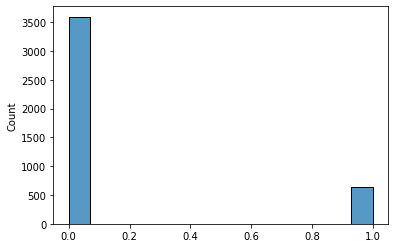

In [98]:
sb.histplot(y)

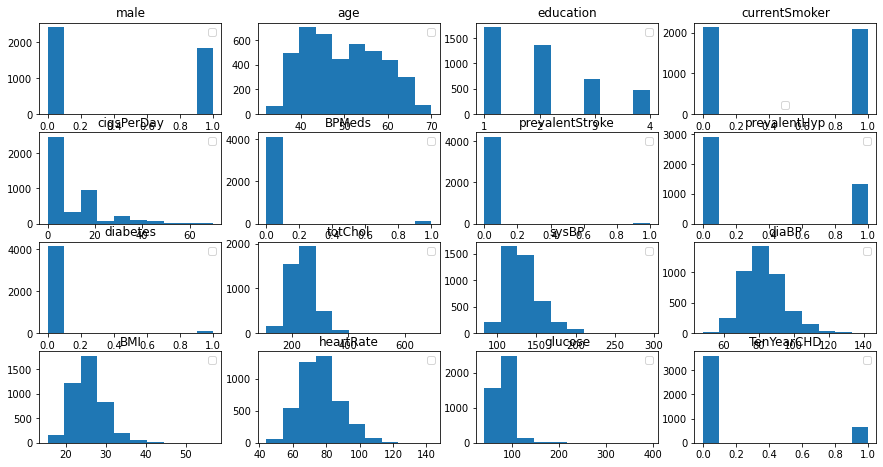

In [99]:
plt.figure(figsize=(15,40))
j=1
for i in data.columns:
    plt.subplot(20,4,j)
    plt.title(i)
    plt.legend(i)
    plt.hist(data[[i]].values) 
    j+=1

/home/raghavgupta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/raghavgupta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/raghavgupta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

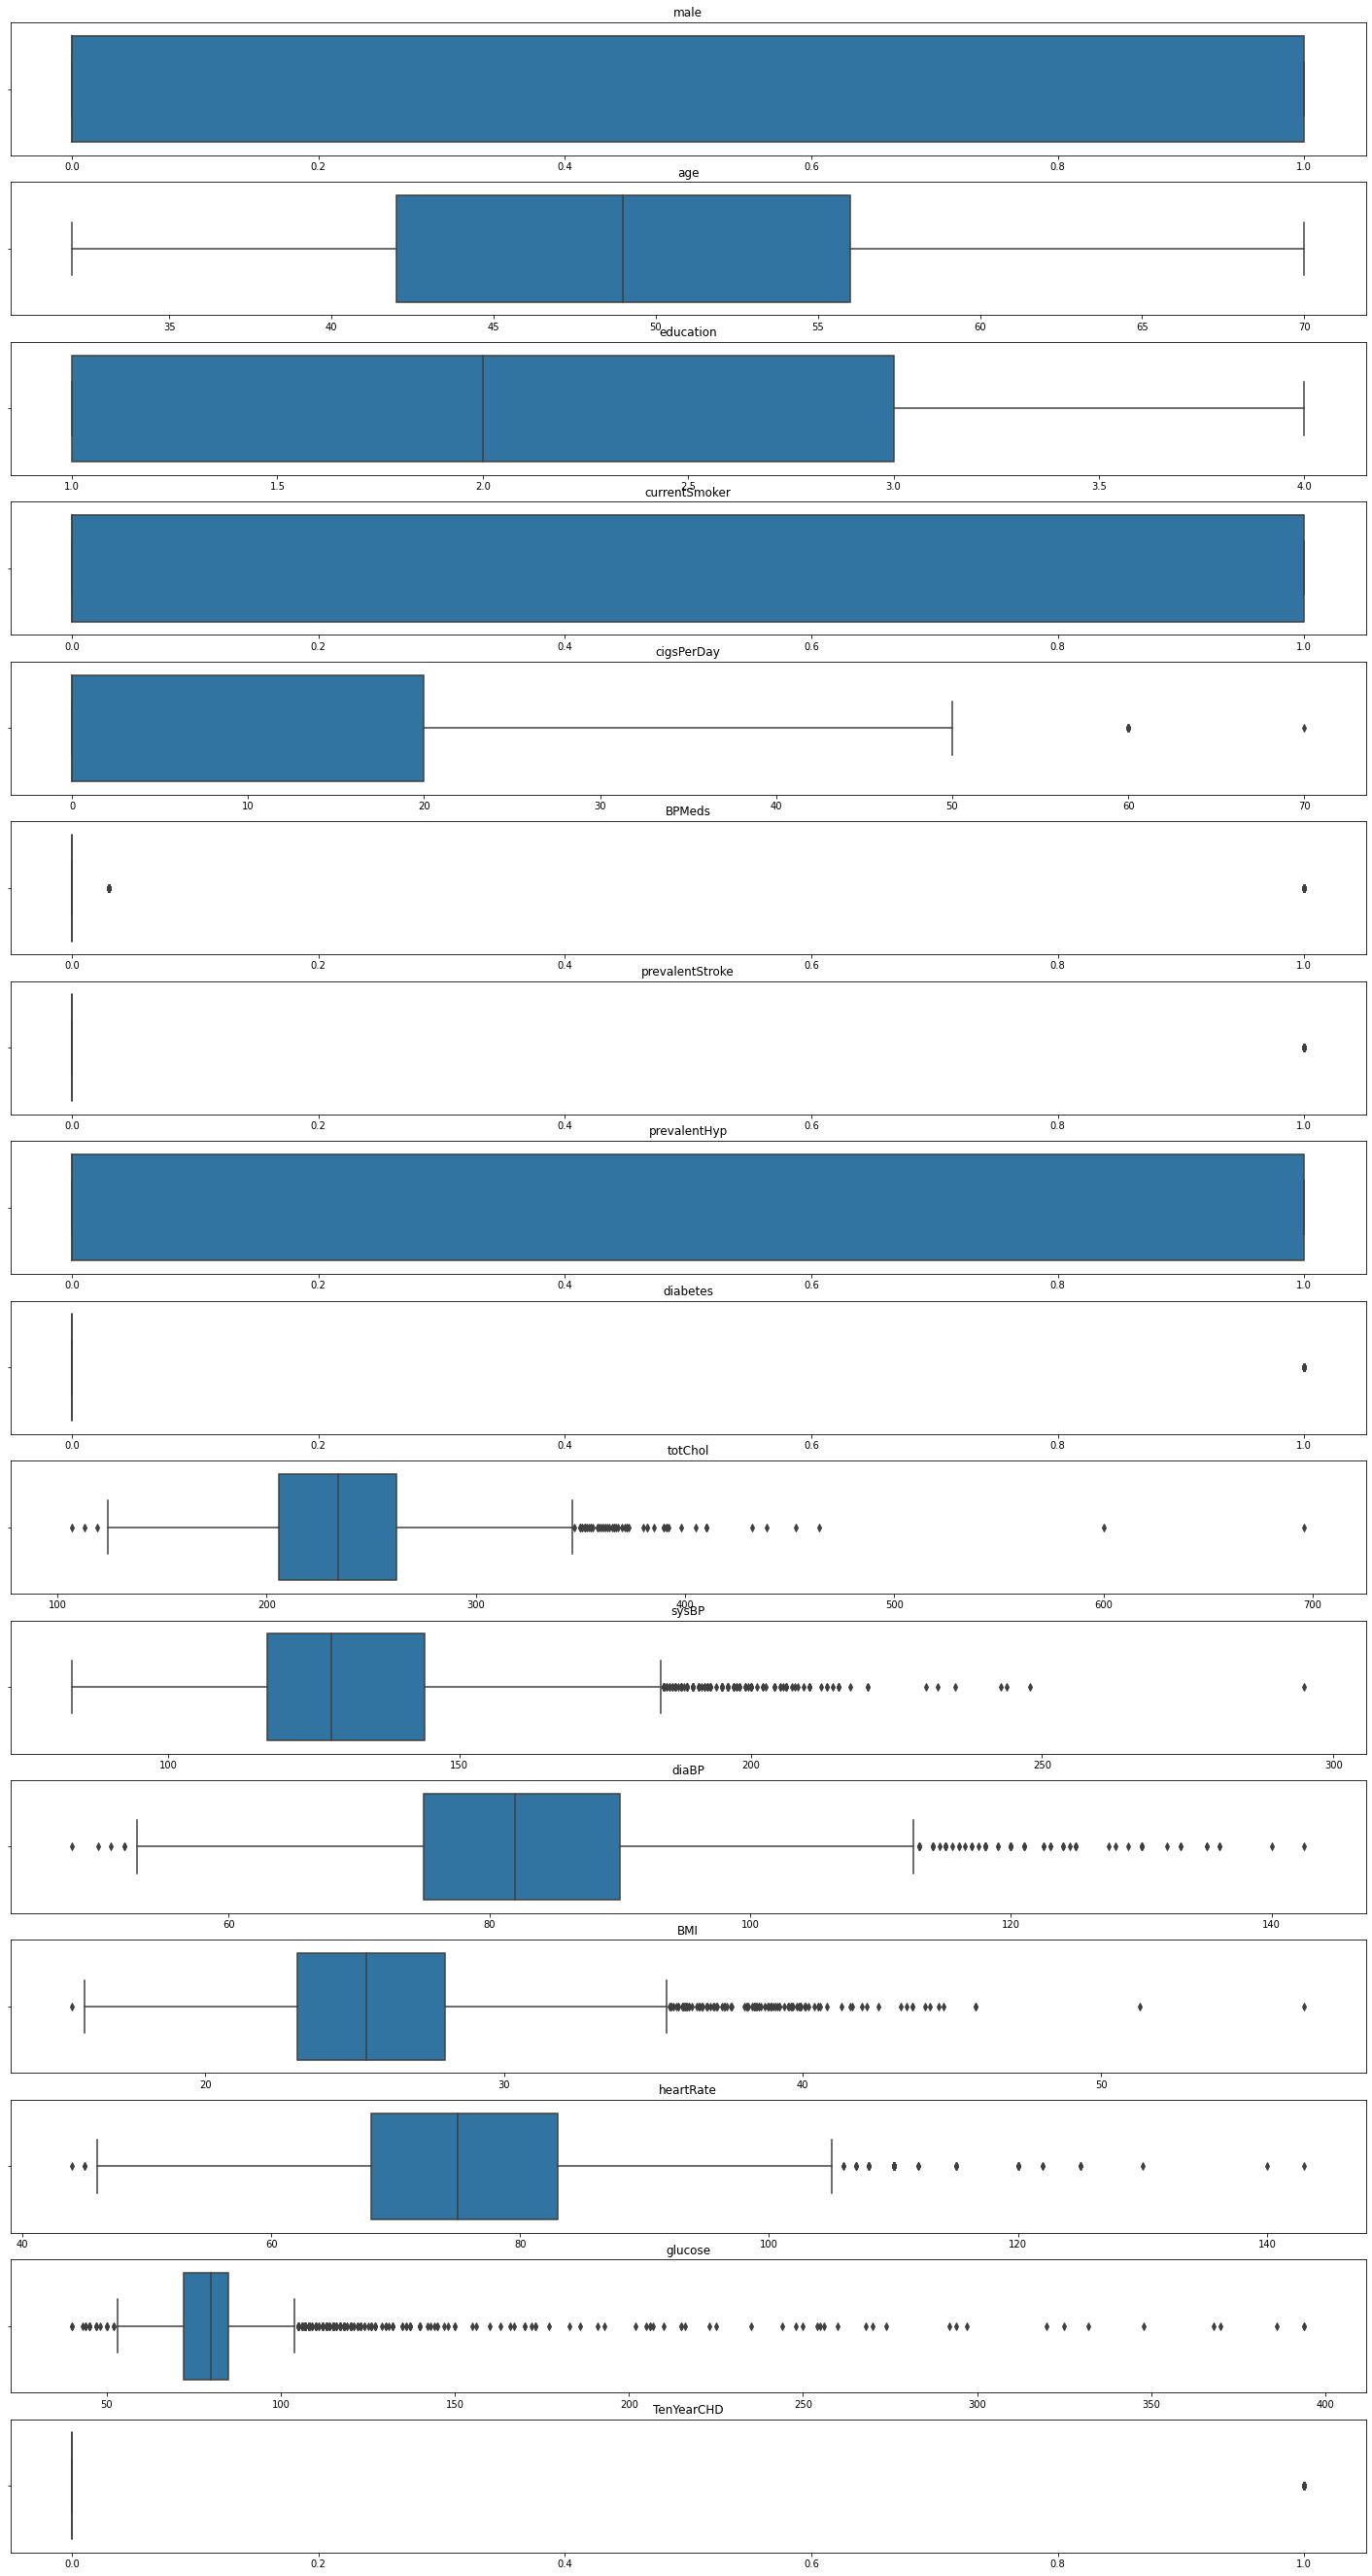

In [100]:
plt.figure(figsize=(25,60))
j=1
for i in data.columns:
    plt.subplot(20,1,j)
    plt.title(i)
    sb.boxplot(data[[i]].values) 
    j+=1

<AxesSubplot:>

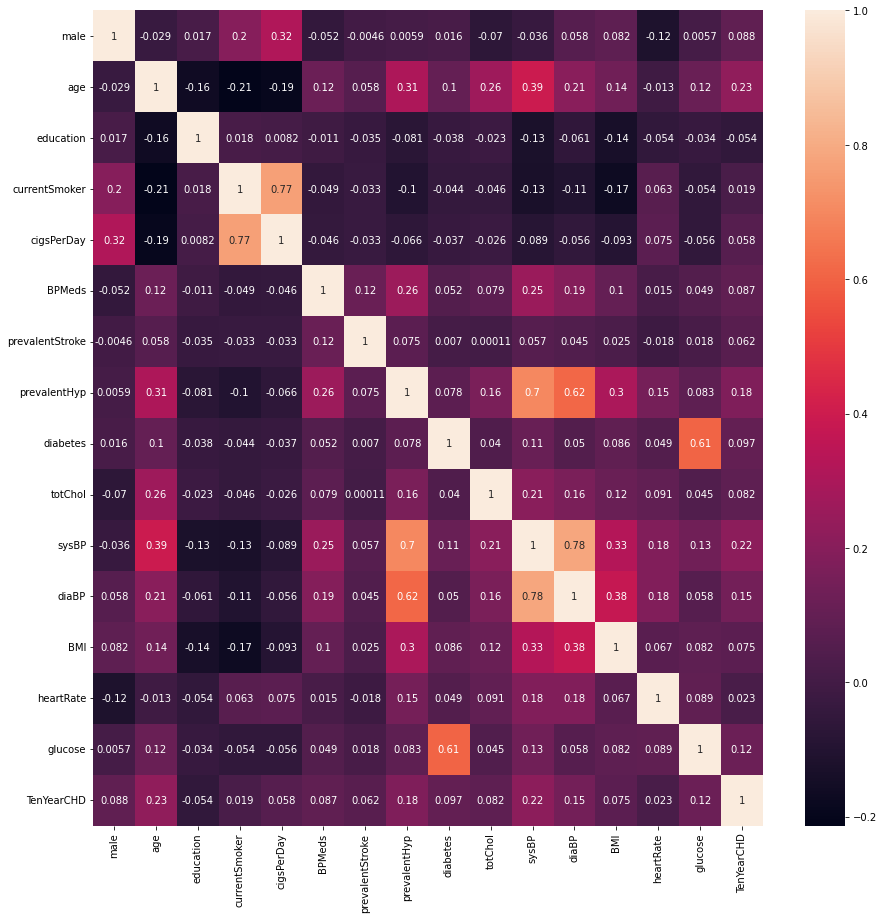

In [101]:
fig, ax = plt.subplots(figsize=(15,15)) 
sb.heatmap(data.corr(),ax=ax,annot=True)

In [102]:
# diaBp is similar to prevalentHyp
data.drop(['diaBP'],axis=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


In [108]:
data[['glucose','heartRate','BMI','diaBP','sysBP','totChol','BPMeds','cigsPerDay']] = np.log(data[['glucose','heartRate','BMI','diaBP','sysBP','totChol','BPMeds','cigsPerDay']].values)

/tmp/ipykernel_7804/2863931265.py:1: RuntimeWarning: divide by zero encountered in log
  data[['glucose','heartRate','BMI','diaBP','sysBP','totChol','BPMeds','cigsPerDay']] = np.log(data[['glucose','heartRate','BMI','diaBP','sysBP','totChol','BPMeds','cigsPerDay']].values)


In [109]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,-inf,-inf,0,0,0,5.273000,4.663439,4.248495,3.294725,1.477511,0.384412,0
1,0,46,2.0,0,-inf,-inf,0,0,0,5.521461,4.795791,4.394449,3.357942,1.515979,0.382358,0
2,1,48,1.0,1,2.995732,-inf,0,0,0,5.501258,4.848116,4.382027,3.232384,1.462674,0.369192,0
3,0,61,3.0,1,3.401197,-inf,0,1,0,5.416100,5.010635,4.553877,3.352707,1.428968,0.427603,1
4,0,46,3.0,1,3.135494,-inf,0,0,0,5.652489,4.867534,4.430817,3.139833,1.491251,0.399616,0
